Cuaderno de exploracion de variables de nuestro Dataset

In [35]:
#Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

In [41]:
#Lectura de CSVs y creacion de dataset
df_2015 = pd.read_csv("../data/world_happiness_2015.csv", sep=";")
df_2016 = pd.read_csv("../data/world_happiness_2016.csv", sep=";")
df_2017 = pd.read_csv("../data/world_happiness_2017.csv", sep=";")
df_2018 = pd.read_csv("../data/world_happiness_2018.csv", sep=";")
df_2019 = pd.read_csv("../data/world_happiness_2019.csv", sep=";")
df_2020 = pd.read_csv("../data/world_happiness_2020.csv", sep=";")
df_2021 = pd.read_csv("../data/world_happiness_2021.csv", sep=";")
df_2022 = pd.read_csv("../data/world_happiness_2022.csv", sep=";")
df_2023 = pd.read_csv("../data/world_happiness_2023.csv", sep=";")
df_2024 = pd.read_csv("../data/world_happiness_2024.csv", sep=";")

#Añadimos la columna Year a cada uno de los dataframes
df_2015["Year"] = "2015"
df_2016["Year"] = "2016"
df_2017["Year"] = "2017"
df_2018["Year"] = "2018"
df_2019["Year"] = "2019"
df_2020["Year"] = "2020"
df_2021["Year"] = "2021"
df_2022["Year"] = "2022"
df_2023["Year"] = "2023"
df_2024["Year"] = "2024"

#Unificamos los df
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], axis=0)

Busqueda de Nulos y Duplicados

In [42]:
#Listamos las columnas
df_all.columns

Index(['Ranking', 'Country', 'Regional indicator', 'Happiness score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year', 'Ladder score'],
      dtype='object')

Explicación de las columnas
- Ranking: Posición del país según el puntaje de felicidad global.
- Country: Nombre del país.
- Regional indicator: Región a la que pertenece el país.
- Ladder score: Puntaje de felicidad basado en encuestas y métricas económicas.
- GDP per capita: Producto interno bruto per cápita ajustado por poder adquisitivo.
- Social support: Nivel de apoyo social percibido por los ciudadanos.
- Healthy life expectancy: Promedio de esperanza de vida saludable.
- Freedom to make life choices: Libertad percibida para tomar decisiones importantes en la vida.
- Generosity: Nivel de generosidad basado en donaciones recientes.
- Perceptions of corruption: Percepción de la corrupción en el gobierno y el sector empresarial.

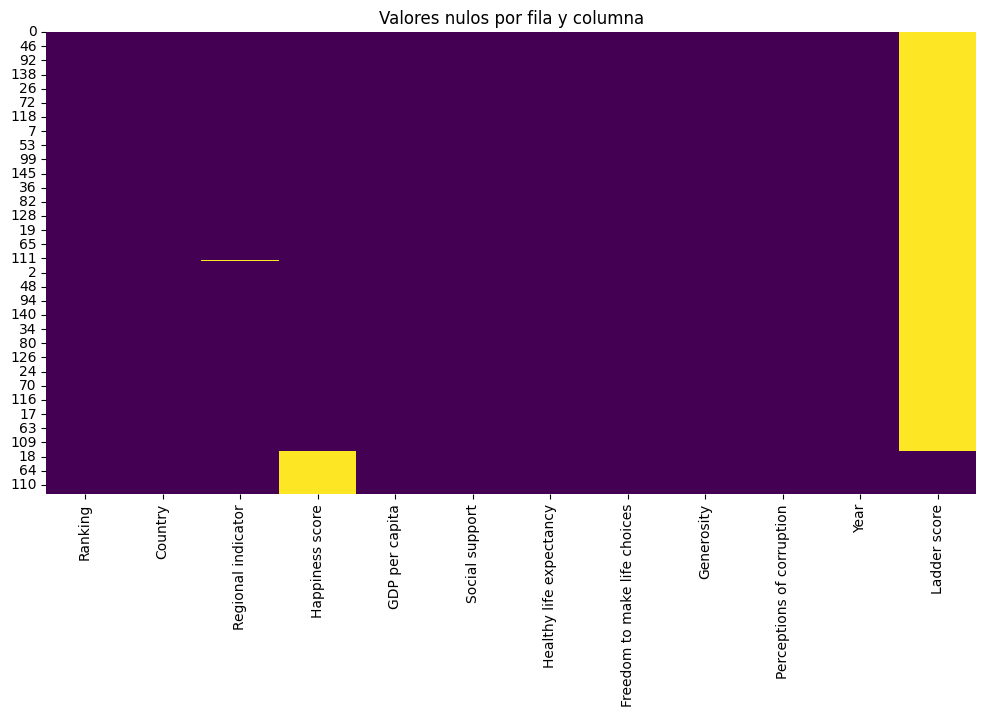

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df_all.isnull(), cbar=False, cmap="viridis")
plt.title("Valores nulos por fila y columna")
plt.show()

La columna Ladder score tiene un gran % de nulos excepto cuando la columna Happiness score no es null. Parece que la columna Hapiness score tiene el nombre de Ladder score en algún fichero. Vamos a comprobar la hipótesis.

In [44]:
query = "SELECT DISTINCT Year FROM df_all WHERE `Happiness score` IS NULL"
resultado = ps.sqldf(query, locals())
print(resultado)

   Year
0  2024


In [45]:
query = "SELECT DISTINCT Year FROM df_all WHERE `Ladder score` IS NULL"
resultado = ps.sqldf(query, locals())
print(resultado)

   Year
0  2015
1  2016
2  2017
3  2018
4  2019
5  2020
6  2021
7  2022
8  2023


In [46]:
print([df_all["Ladder score"], df_all["Happiness score"]])

[0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
135    5,6067
136     6,043
137     3,561
138    3,5024
139    3,3411
Name: Ladder score, Length: 1502, dtype: object, 0      7,59
1      7,56
2      7,53
3      7,52
4      7,43
       ... 
135     NaN
136     NaN
137     NaN
138     NaN
139     NaN
Name: Happiness score, Length: 1502, dtype: object]


Efectivamente confirmamos nuestra hipótesis
- Para el año 2024 la columna Happiness score siempre es nula
- Para los años restantes (no 2024) la columna Ladder score siempre es nula
- Ambas columnas tienen el mismo formato

Cuando realicemos las transformaciones en el fichero de 2024 tendremos que nombrar la columna Ladder score como Happiness score
